In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.listdir(r'C:\Users\nirma\Downloads\Uber')

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [4]:
uber_ls= pd.read_csv(r'C:\Users\nirma\Downloads\Uber/uber-raw-data-janjune-15_sample.csv')

In [5]:
uber_ls.shape

(100000, 4)

In [6]:
uber_ls.duplicated().sum()

54

In [7]:
uber_ls.drop_duplicates(inplace=True)

In [8]:
uber_ls.duplicated().sum()

0

In [9]:
uber_ls.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [10]:
uber_ls.isnull()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99995,False,False,False,False
99996,False,False,False,False
99997,False,False,False,False
99998,False,False,False,False


In [11]:
uber_ls.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [12]:
uber_ls['Pickup_date'] = pd.to_datetime(uber_ls['Pickup_date'])

In [13]:
uber_ls['Pickup_date'].dtype

dtype('<M8[ns]')

In [14]:
uber_ls.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [15]:
uber_ls['month'] = uber_ls['Pickup_date'].dt.month_name()

In [16]:
uber_ls['weekday'] = uber_ls['Pickup_date'].dt.day_name()

In [17]:
pivot =pd.crosstab(index = uber_ls['month'], columns = uber_ls['weekday'])

<Figure size 15000x10000 with 0 Axes>

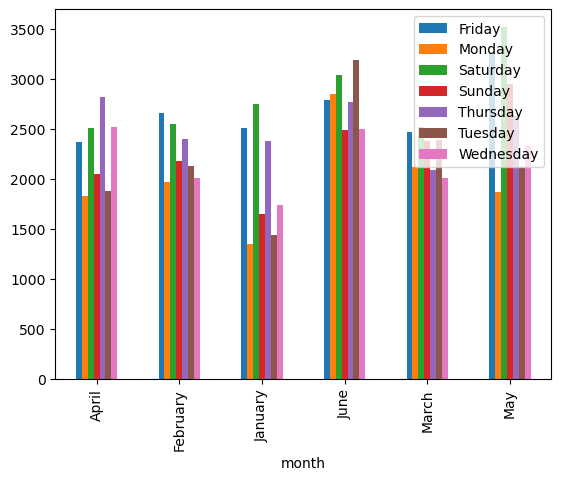

In [18]:
plt.figure(figsize=(150,100))
pivot.plot.bar()
plt.legend()

In [19]:
uber_ls['hour'] = uber_ls['Pickup_date'].dt.hour

In [20]:
summary = uber_ls.groupby(['weekday','hour'], as_index = False).size()

In [21]:
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<AxesSubplot:xlabel='hour', ylabel='size'>

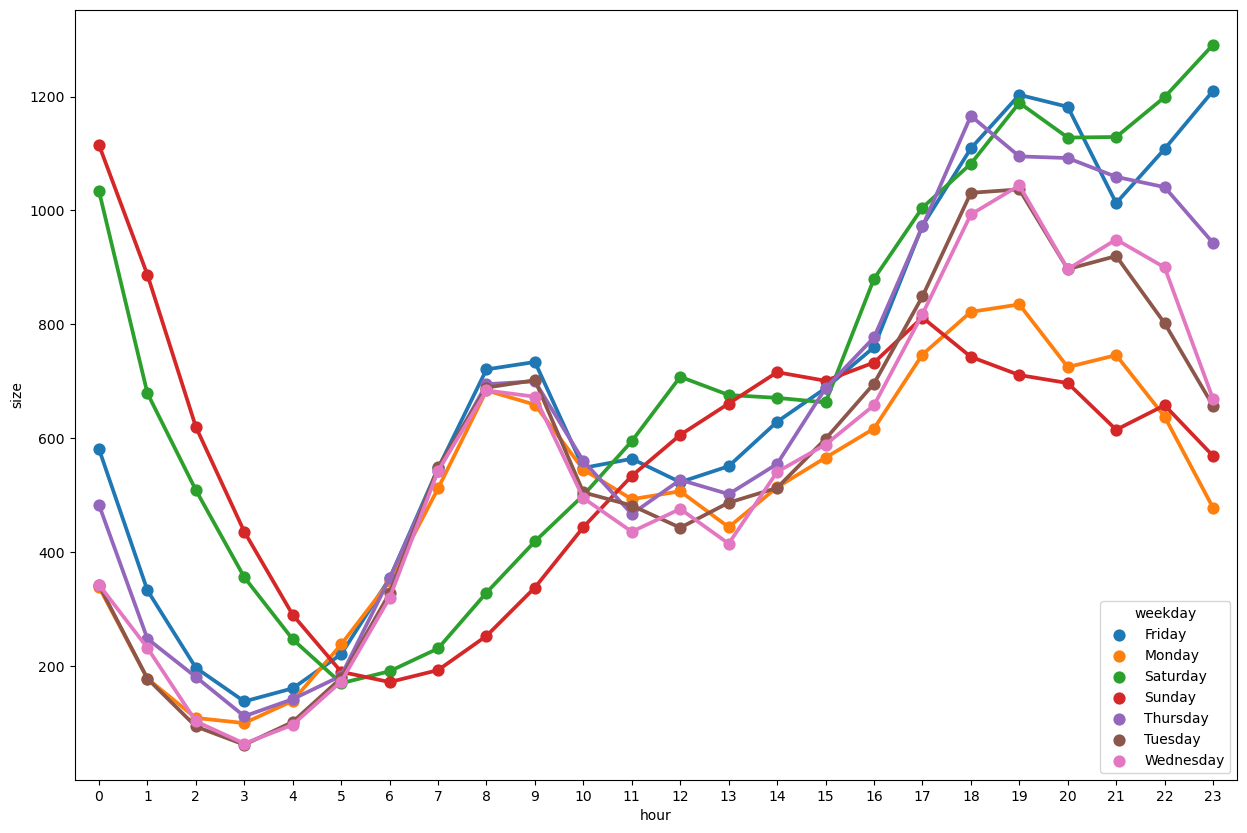

In [22]:
plt.figure(figsize=(15,10))
sns.pointplot(x='hour',y='size', hue ='weekday', data = summary)

In [23]:
uber_foil= pd.read_csv(r'C:\Users\nirma\Downloads\Uber/Uber-Jan-Feb-FOIL.csv')

In [24]:
uber_foil.shape

(354, 4)

In [25]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [26]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [27]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [28]:
init_notebook_mode(connected = True)

In [29]:
px.box(x='dispatching_base_number', y = 'active_vehicles', data_frame = uber_foil)